In [1]:
# Connect the Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gH4DnlLg4Gi5fnlGzCMa")
project = rf.workspace("ml-pzfty").project("chv-dataset")
version = project.version(1)
dataset = version.download("yolov12")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chv-DATASET-1 in yolov12:: 100%|██████████| 6928/6928 [00:01<00:00, 4020.97it/s]


In [4]:
!pip install ultralytics

from ultralytics import YOLO

import torch
import torch.nn as nn


# 모델 YAML 파일 경로
model_yaml_path = "/content/drive/MyDrive/capstone/yolo.yaml"  # 사용자가 제공한 yaml 파일 경로

# YAML 파일을 기반으로 YOLO 모델 불러오기
model = YOLO(model_yaml_path)

# 모델 정보 출력
model.info()

# YOLO 모델 학습
results = model.train(
    data="/content/chv-DATASET-1/data.yaml",
    epochs=10000000,
    imgsz=640,
    batch=50,
    patience=50,
    name='CHV-dataset',
    save=True,
    save_period=-1,            # ✅ 매 epoch 저장 X
)

WARNING ⚠️ no model scale passed. Assuming scale='n'.
YOLO summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/capstone/yolo.yaml, data=/content/chv-DATASET-1/data.yaml, epochs=10000000, time=None, patience=50, batch=50, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=CHV-dataset2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=1 with nc=3
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]        

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 40.6±12.9 MB/s, size: 131.4 KB)


train: Scanning /content/chv-DATASET-1/train/labels... 3192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3192/3192 [00:06<00:00, 486.49it/s]

train: New cache created: /content/chv-DATASET-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.9±9.1 MB/s, size: 51.3 KB)


val: Scanning /content/chv-DATASET-1/valid/labels... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 497.81it/s]

val: New cache created: /content/chv-DATASET-1/valid/labels.cache


Plotting labels to runs/detect/CHV-dataset2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000390625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/CHV-dataset2
Starting training for 10000000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 1/10000000      8.95G       3.96      4.119      4.242        396        640: 100%|██████████| 64/64 [01:02<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.34s/it]

                   all        133        894     0.0021      0.118    0.00198   0.000511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 2/10000000      8.51G      3.638      3.791      3.988        455        640: 100%|██████████| 64/64 [00:57<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        133        894     0.0254      0.321     0.0222    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 3/10000000      8.96G      2.925      3.248      3.267        462        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all        133        894      0.119       0.11     0.0515     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 4/10000000        10G       2.52      2.773      2.751        454        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        133        894       0.24      0.195      0.156     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 5/10000000      7.96G      2.213      2.324      2.416        550        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all        133        894      0.379      0.352      0.308      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 6/10000000      8.37G      2.019      2.034      2.212        442        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.568      0.489      0.492       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 7/10000000      7.25G      1.899      1.866      2.092        455        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        133        894      0.702      0.532      0.623      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 8/10000000      8.38G       1.84      1.742      2.009        480        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        133        894      0.792      0.606      0.694      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 9/10000000       8.7G        1.8      1.656      1.949        489        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.665      0.652      0.666      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


10/10000000      8.07G      1.762       1.58        1.9        488        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        133        894      0.768      0.629      0.725       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


11/10000000      8.18G       1.73      1.536      1.873        476        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.783      0.695      0.753      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


12/10000000      7.43G      1.708      1.486      1.835        513        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        133        894      0.794      0.674      0.757       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


13/10000000      8.38G      1.692      1.448      1.815        392        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        133        894      0.808       0.67      0.772      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


14/10000000      8.55G       1.66      1.407      1.801        379        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        133        894      0.776      0.689      0.758      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


15/10000000      7.83G      1.641      1.371      1.786        575        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        133        894      0.829      0.691      0.789      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


16/10000000       8.1G      1.621      1.337      1.762        600        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.805      0.729      0.802      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


17/10000000      8.16G      1.618       1.32      1.735        470        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        133        894       0.82      0.714      0.803      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


18/10000000      7.59G      1.605      1.302      1.733        526        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894       0.86      0.711      0.816       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


19/10000000       8.1G      1.588      1.278      1.711        428        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        133        894      0.835      0.739      0.829       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


20/10000000      8.91G      1.574      1.252      1.695        480        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.826      0.726      0.809      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


21/10000000      7.62G      1.569      1.249      1.694        457        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all        133        894      0.826      0.741      0.831      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


22/10000000      8.09G      1.551       1.21      1.678        423        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        133        894      0.825      0.707      0.801      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


23/10000000      8.12G      1.547      1.196      1.663        515        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        133        894      0.845      0.753      0.833      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


24/10000000      7.54G      1.541      1.196      1.663        408        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.858      0.752      0.826      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


25/10000000      7.83G      1.524      1.172      1.644        553        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        133        894      0.861      0.745      0.845      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


26/10000000      8.23G      1.525      1.167       1.64        482        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        133        894      0.843      0.751      0.849       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


27/10000000      7.81G       1.52       1.16      1.646        501        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.874      0.747      0.856      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


28/10000000      7.83G        1.5      1.149      1.624        405        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.842      0.769      0.845      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


29/10000000      8.56G      1.505      1.134      1.626        528        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        133        894      0.846      0.792      0.864       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


30/10000000      8.66G      1.489      1.109      1.617        564        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        133        894      0.871      0.779      0.851      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


31/10000000       8.1G      1.497       1.12      1.604        477        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.864       0.79      0.867      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


32/10000000      9.11G       1.49      1.108      1.602        485        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.869        0.8      0.873      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


33/10000000      7.99G      1.484      1.092      1.587        459        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        133        894      0.869      0.766      0.869      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


34/10000000      8.02G      1.463       1.07       1.58        451        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all        133        894      0.859      0.801      0.866      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


35/10000000      7.95G       1.47      1.079      1.595        472        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.867      0.783      0.876      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


36/10000000       8.2G      1.474      1.082      1.579        408        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.866      0.794      0.873      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


37/10000000      8.17G      1.459      1.061      1.572        431        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.886      0.778       0.87       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


38/10000000       7.8G       1.44      1.039      1.552        457        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        133        894      0.887        0.8      0.882      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


39/10000000      7.82G      1.457      1.057      1.569        531        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all        133        894      0.879      0.789      0.873      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


40/10000000      7.61G      1.449      1.037      1.559        406        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.911       0.76      0.872      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


41/10000000      7.41G      1.438      1.032      1.545        435        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894       0.87      0.789      0.872      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


42/10000000      7.51G      1.428       1.03      1.551        460        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        133        894      0.895      0.815      0.885      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


43/10000000      8.25G      1.438      1.018      1.547        416        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.904      0.771      0.872      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


44/10000000      8.81G      1.433      1.017       1.54        471        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        133        894      0.879      0.801      0.872      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


45/10000000      7.45G      1.418      1.009      1.531        560        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.882      0.788      0.869      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


46/10000000      8.23G      1.427      1.011      1.542        465        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894       0.85      0.835      0.879      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


47/10000000      7.88G      1.422     0.9908       1.53        421        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894      0.878      0.793      0.875      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


48/10000000      8.29G      1.407     0.9875      1.518        536        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        133        894      0.897       0.81      0.888      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


49/10000000      8.59G      1.406     0.9836      1.522        444        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        133        894      0.878      0.781       0.87      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


50/10000000      7.66G      1.413     0.9815      1.525        464        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.866      0.812      0.876      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


51/10000000       7.3G      1.394     0.9732      1.515        509        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.886      0.788      0.864      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


52/10000000      7.94G      1.398     0.9749      1.509        502        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894      0.889      0.807      0.877      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


53/10000000      8.65G      1.396     0.9656      1.512        434        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894        0.9      0.793      0.883      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


54/10000000      7.97G      1.378     0.9486      1.505        367        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.861      0.839      0.887      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


55/10000000      8.64G      1.384     0.9522      1.503        470        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        133        894      0.886      0.789      0.865      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


56/10000000      7.33G       1.39     0.9629      1.502        562        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        133        894       0.88      0.811      0.884      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


57/10000000      7.84G      1.379     0.9471      1.488        449        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894       0.87      0.803      0.873      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


58/10000000      7.92G      1.372     0.9428      1.487        498        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.876      0.833      0.893      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


59/10000000      8.23G      1.382     0.9473       1.49        475        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894       0.87      0.811      0.876       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


60/10000000      9.17G      1.361     0.9307      1.478        542        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        133        894      0.906      0.806      0.886      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


61/10000000      8.15G       1.37     0.9313      1.484        552        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.924      0.794      0.892      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


62/10000000      7.97G       1.37     0.9258      1.472        533        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        133        894      0.904        0.8      0.884        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


63/10000000      7.91G      1.354     0.9201       1.47        456        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.871       0.83      0.891      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


64/10000000      8.27G      1.361     0.9198       1.47        438        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.893      0.776      0.872      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


65/10000000       8.6G      1.355     0.9149      1.472        539        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.871      0.813      0.874       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


66/10000000      7.66G      1.356     0.9089      1.464        391        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.886      0.824       0.89      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


67/10000000      8.12G      1.352     0.9068      1.466        446        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        133        894      0.899      0.798      0.879      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


68/10000000      8.85G      1.349     0.9146      1.462        369        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.892      0.824       0.89      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


69/10000000      8.85G      1.339     0.8964      1.446        693        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.924      0.798      0.893      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


70/10000000      8.38G      1.341     0.8995      1.452        500        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.902      0.816      0.889      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


71/10000000      8.88G      1.334     0.8874      1.445        553        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.895      0.818      0.891      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


72/10000000      7.74G      1.328     0.8958      1.445        425        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all        133        894      0.881      0.834      0.893      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


73/10000000      8.37G      1.333     0.8937      1.448        356        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.914      0.811      0.894      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


74/10000000      7.65G      1.343     0.8982      1.452        339        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.902      0.818       0.89        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


75/10000000      8.11G      1.337     0.8988      1.451        385        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.905      0.825      0.896      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


76/10000000      7.69G      1.321     0.8735       1.44        480        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.914      0.834      0.897      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


77/10000000      9.16G      1.335     0.8908      1.443        485        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        133        894       0.89      0.839      0.897       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


78/10000000       8.2G      1.319     0.8763      1.429        493        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        133        894      0.916      0.837      0.897      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


79/10000000      8.73G      1.318       0.87       1.43        471        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.892      0.821      0.889        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


80/10000000      8.03G      1.296       0.86      1.428        408        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894       0.91      0.824      0.892      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


81/10000000      9.04G      1.314     0.8727      1.419        606        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        133        894      0.895      0.825      0.894      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


82/10000000      8.78G       1.31     0.8575      1.412        423        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.882      0.845      0.892      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


83/10000000      8.78G      1.307     0.8506      1.411        434        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        133        894      0.895      0.818      0.894      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


84/10000000      7.86G      1.298     0.8528      1.411        475        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894      0.896      0.839      0.899      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


85/10000000      7.99G      1.298     0.8543      1.412        436        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.888       0.85      0.897      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


86/10000000       7.7G      1.313     0.8615      1.413        534        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.907      0.846      0.904      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


87/10000000      8.09G      1.291     0.8475      1.402        468        640: 100%|██████████| 64/64 [00:57<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        133        894      0.903      0.829        0.9      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


88/10000000      7.71G      1.291      0.846      1.407        483        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        133        894      0.902      0.829      0.898      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


89/10000000      8.05G      1.298     0.8393        1.4        405        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        133        894        0.9      0.846        0.9      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


90/10000000      7.95G      1.291     0.8389      1.401        387        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.889      0.848      0.895      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


91/10000000      7.28G      1.276     0.8335      1.398        532        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        133        894      0.889      0.846      0.893      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


92/10000000       7.9G      1.285     0.8308      1.387        465        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.912      0.841      0.903      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


93/10000000      7.23G       1.28     0.8262      1.397        510        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        133        894      0.889      0.847      0.897      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


94/10000000      7.67G      1.273     0.8308      1.395        391        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        133        894       0.92      0.829      0.894      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


95/10000000      7.83G      1.283     0.8293       1.39        442        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        133        894      0.913      0.843      0.897      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


96/10000000       8.2G      1.277     0.8332      1.398        443        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894      0.907      0.835      0.899       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


97/10000000      7.62G      1.277     0.8256      1.395        383        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        133        894      0.915      0.818      0.888      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


98/10000000      8.02G       1.28     0.8261      1.394        548        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        133        894      0.892      0.851      0.901      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


99/10000000      7.95G      1.262     0.8195      1.381        467        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        133        894      0.913       0.82      0.895      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


100/10000000      8.77G      1.269     0.8137      1.371        414        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.918      0.817        0.9      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


101/10000000      7.18G      1.262     0.8199      1.382        397        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.894      0.864      0.904       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


102/10000000      8.72G      1.253     0.8009      1.372        427        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        133        894      0.924      0.825      0.903       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


103/10000000      7.44G      1.257      0.814      1.381        613        640:  69%|██████▉   | 44/64 [00:39<00:17,  1.12it/s]


KeyboardInterrupt: 

In [5]:
import shutil
from google.colab import files

# 1. 압축
shutil.make_archive('test_results', 'zip', '/content/runs')

# 2. 다운로드
files.download('test_results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/133 /content/chv-DATASET-1/test/images/ppe_0001_jpg.rf.09de01d4574daed0b6b70431735c36fb.jpg: 640x640 14 0s, 3 1s, 9 2s, 8.6ms
image 2/133 /content/chv-DATASET-1/test/images/ppe_0005_jpg.rf.951addcb6b1c7455499abdfdcdbc822b.jpg: 640x640 28 0s, 2 1s, 3 2s, 11.7ms
image 3/133 /content/chv-DATASET-1/test/images/ppe_0030_jpg.rf.3e7fa2ff2e19a52920cd2732d5d4d99a.jpg: 640x640 17 0s, 10 1s, 25 2s, 9.7ms
image 4/133 /content/chv-DATASET-1/test/images/ppe_0032_jpg.rf.3d7c65ecb1342dc62dcaa9552e9072a5.jpg: 640x640 23 0s, 5 1s, 17 2s, 8.6ms
image 5/133 /content/chv-DATASET-1/test/images/ppe_0045_jpg.rf.4cac6f60788a90a864aa44bd98a9e7dc.jpg: 640x640 12 0s, 20 1s, 10 2s, 15.6ms
image 6/133 /content/chv-DATASET-1/test/images/ppe_0061_jpg.rf.ec8dcfe8e4e742d7572483537f31740c.jpg: 640x640 5 0s, 3 1s, 1 2, 12.1ms
image 7/133 /content/chv-DATASET-1/test/images/ppe_0067_jpg.rf.ffc788e441b4a66e2bb2e937aefd7437.jpg: 640x640 8 0s, 21 2s, 8.6ms
image 8/133 /content/chv-DATASET-1/test/images/ppe_0089_jpg.r

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.


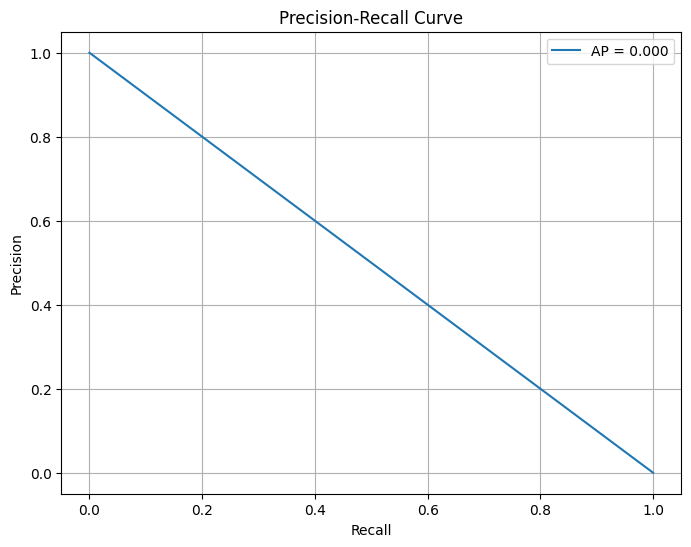

In [8]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import numpy as np

# 모델 불러오기
model = YOLO("/content/runs/detect/CHV-dataset2/weights/best.pt")  # 학습된 모델 경로

# 추론 수행
results = model.predict(source="/content/chv-DATASET-1/test/images/", save=False, stream=True, conf=0.001, iou=0.65)

# 예측 결과 저장 (필요 시)
pred_boxes = []
gt_boxes = []
image_ids = []

# GT 라벨 경로
label_dir = "/content/chv-DATASET-1/test/labels"

# 추론 결과 순회
for r in results:
    path = r.path
    image_id = os.path.basename(path).split('.')[0]
    image_ids.append(image_id)

    # 예측 박스: [class, confidence, x1, y1, x2, y2]
    preds = r.boxes.data.cpu().numpy()  # (N, 6)
    pred_boxes.append(preds)

    # GT 라벨 불러오기
    label_path = os.path.join(label_dir, f"{image_id}.txt")
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            gt = []
            for line in f:
                cls, x, y, w, h = map(float, line.strip().split())
                # YOLO format to xyxy
                x1 = x - w / 2
                y1 = y - h / 2
                x2 = x + w / 2
                y2 = y + h / 2
                gt.append([cls, x1, y1, x2, y2])
            gt_boxes.append(np.array(gt))
    else:
        gt_boxes.append(np.array([]))  # No label file

# ------------------------------------------------------
# 🔍 Precision-Recall Curve 계산
from sklearn.metrics import precision_recall_curve, average_precision_score

all_scores = []
all_matches = []
all_labels = []

for pred, gt in zip(pred_boxes, gt_boxes):
    if len(pred) == 0 and len(gt) == 0:
        continue
    scores = pred[:, 1] if len(pred) > 0 else []
    pred_boxes_xyxy = pred[:, 2:] if len(pred) > 0 else np.zeros((0, 4))
    gt_boxes_xyxy = gt[:, 1:] if len(gt) > 0 else np.zeros((0, 4))

    for score, pb in zip(scores, pred_boxes_xyxy):
        ious = []
        for gb in gt_boxes_xyxy:
            # IOU 계산
            inter_x1 = max(pb[0], gb[0])
            inter_y1 = max(pb[1], gb[1])
            inter_x2 = min(pb[2], gb[2])
            inter_y2 = min(pb[3], gb[3])
            inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

            pb_area = (pb[2] - pb[0]) * (pb[3] - pb[1])
            gb_area = (gb[2] - gb[0]) * (gb[3] - gb[1])
            union = pb_area + gb_area - inter_area

            iou = inter_area / union if union > 0 else 0
            ious.append(iou)

        max_iou = max(ious) if ious else 0
        match = 1 if max_iou >= 0.5 else 0

        all_scores.append(score)
        all_matches.append(match)

all_labels = all_matches

# PR Curve
precision, recall, thresholds = precision_recall_curve(all_labels, all_scores)
ap = average_precision_score(all_labels, all_scores)

# ------------------------------------------------------
# ✅ PR Curve 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()
